## learning-AI : deep learning application (61357002)
### assignment : PCA-ed diabetes classification using SVM, random forest, XGBoost, DNN, CNN(recurrence), U-net (DL)

**당뇨 데이터를 PCA 하여 dimensionality reduction 후 classification (SVM, random forest, XGBoost, DNN, CNN(recurrence), U-net)**

<br>

- **임규연 (lky473736)**
- 2024.10.09.에 문서 작성
- **dataset** : https://github.com/plotly/datasets/blob/master/diabetes.csv
- **kaggle** : https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data
- **data abstract** : This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

------

## <span id='dl'><mark>DL</mark></span>

- **Reference**
    - https://huidea.tistory.com/44
    - https://butter-shower.tistory.com/210
    
<br>
    
deep learning으로 diabetes를 classification한다. **diabetes의 차원을 줄이기 위하여, PCA를 도입한다. PCA를 도입한 후 다양한 모델을 이용하여 학습한다.**

- **1. 간단한 탐색적 데이터 분석 및 데이터 전처리 수행**
- **2. PCA (Principle Component Analysis) 및 SMOTE, 순환 데이터 구성**
- **3. 다양한 모델을 통한 학습**
    - SVM
    - random forest
    - XGBoost
    - DNN
    - CNN(Recurrence)
    - U-net


In [781]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy
from tqdm import tqdm

In [782]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D


-----------

### 1. 간단한 탐색적 데이터 분석 및 데이터 전처리 수행
- 데이터 시각화 및 필요한 정보를 얻어낸다.
- 결측치 제거, outlier 제거 등의 데이터 전처리를 수행한다.

In [783]:
# 파일 읽기

df = pd.read_csv('../../data/diabetes.csv')

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [784]:
# df의 기본적인 통계량 수치 파악, 각 열마다의 데이터 타입 

for feature in df.columns :
    print (f'{feature}의 데이터 타입 : ', df[feature].dtype)

df.describe()

Pregnancies의 데이터 타입 :  int64
Glucose의 데이터 타입 :  int64
BloodPressure의 데이터 타입 :  int64
SkinThickness의 데이터 타입 :  int64
Insulin의 데이터 타입 :  int64
BMI의 데이터 타입 :  float64
DiabetesPedigreeFunction의 데이터 타입 :  float64
Age의 데이터 타입 :  int64
Outcome의 데이터 타입 :  int64


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [785]:
#  결측치 확인 및 dropna로 결측치에 해당되는 record 삭제

print (df.isnull().sum())
df = df.dropna()
print ('\n', df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


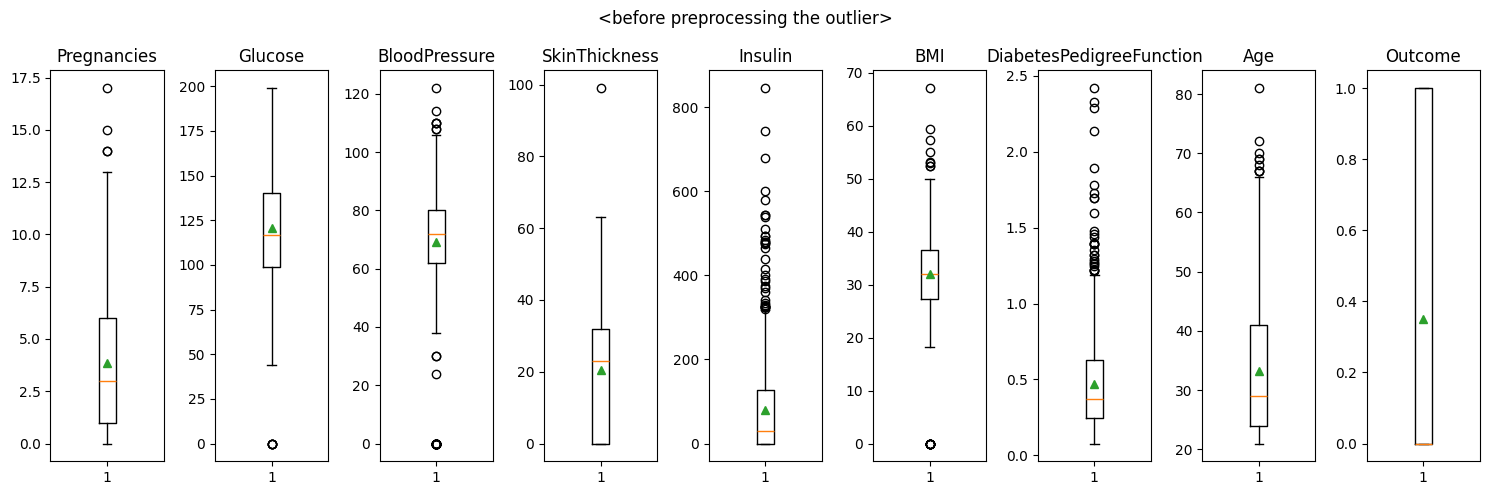

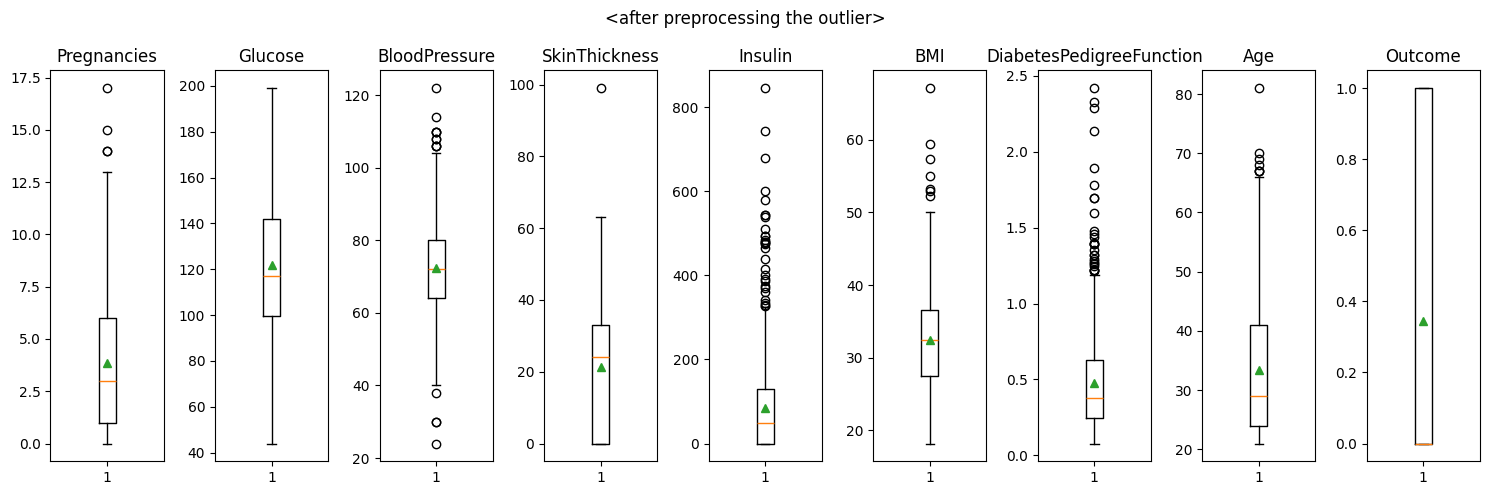

In [786]:
# subplot 시각화 및 outlier 전처리

fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))

for i, var in enumerate(df.columns) :
    ax = axes[i]
    ax.boxplot(df[var], showmeans=True)
    ax.set_title(var)

fig.suptitle("<before preprocessing the outlier>")
plt.tight_layout()
plt.show()

#############

# outlier 제거 및 다시 boxplot 시각화

df = df[(df['BMI'] != 0) & (df['Glucose'] != 0) & (df['BloodPressure'] != 0)] 
# 특정 feature가 0이 되는 지점이 결측치가 된다

fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))

for i, var in enumerate(df.columns) :
    ax = axes[i]
    ax.boxplot(df[var], showmeans=True)
    ax.set_title(var)

fig.suptitle("<after preprocessing the outlier>")
plt.tight_layout()
plt.show()

'\n    추후에 PCA 후 SMOTE 적용 예정\n'

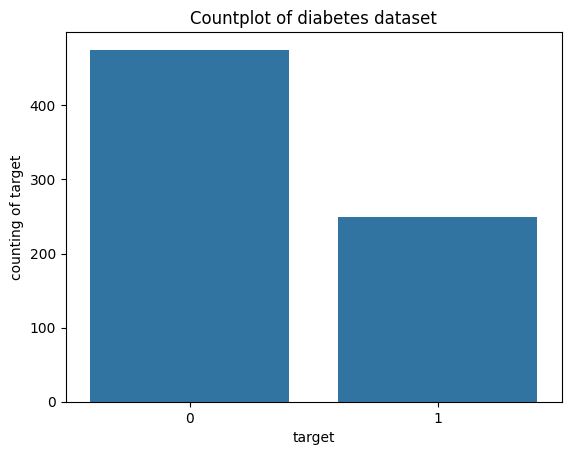

In [787]:
# target 별 counting

sns.countplot(data = df, x="Outcome")
plt.xlabel('target')
plt.ylabel("counting of target")
plt.title('Countplot of diabetes dataset')

df['Outcome'].value_counts()

'''
    추후에 PCA 후 SMOTE 적용 예정
'''

In [788]:
# split the input, target

diabetes_input = df.drop(columns=['Outcome'])
diabetes_target = df['Outcome']

print (diabetes_input.head())
print ('\n')
print (diabetes_target.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


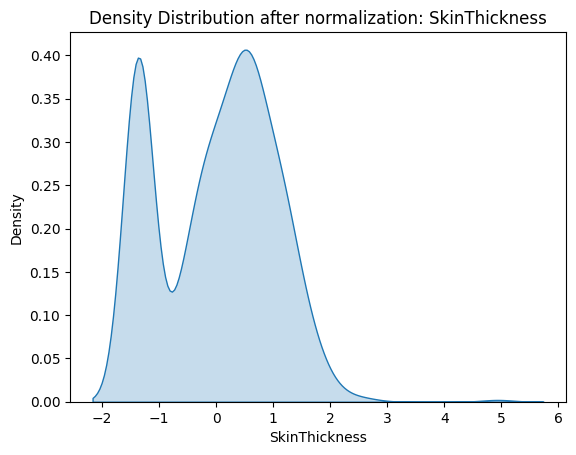

'\n    참고로, PCA를 수행시키기 전에는 항상 단위를 표준화시켜주기 위하여 \n    normalization을 꼭 해야한다. (무조건)\n'

In [789]:
# Z-score normalization

from sklearn.preprocessing import StandardScaler

features = df.columns[:-1]  # 'Outcome' 제외

normalizer = StandardScaler()
diabetes_input_scaled = pd.DataFrame(normalizer.fit_transform(diabetes_input), 
                              columns=features)  

# 예시로, SkinThickness를 시각화하여 normalization이 잘 되었는지 확인해보기
sns.kdeplot(diabetes_input_scaled['SkinThickness'], fill=True)
plt.title(f'Density Distribution after normalization: SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Density')
plt.show()

'''
    참고로, PCA를 수행시키기 전에는 항상 단위를 표준화시켜주기 위하여 
    normalization을 꼭 해야한다. (무조건)
'''

-----

### 2. PCA (Principle Component Analysis) 및 SMOTE, 순환 데이터 구성

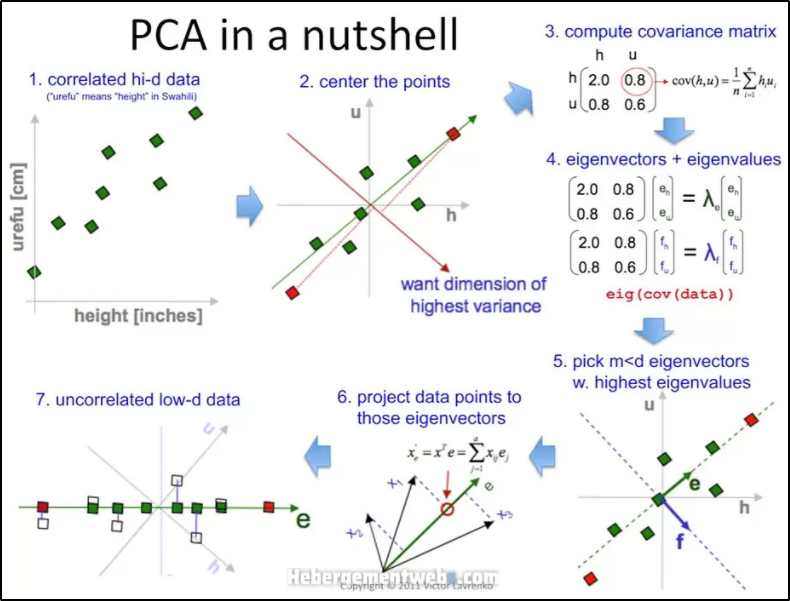

<br>

잠시 1학년 때 선형대수학에서 배운 내용을 상기시켜 보자. 선형대수학에서 고윳값과 고유벡터에 대하여 다룬 적이 있다. 고윳값은 선형 변환이 특정 방향으로 어떻게 작용하는지를 나타내는 값이다. 주어진 행렬 $A$에 대해, 고유벡터 $\mathbf{v}$는 다음의 식을 만족하는 벡터이다: 

$$
A\mathbf{v} = \lambda \mathbf{v}
$$

여기서 $\lambda$는 고윳값으로, 고유벡터가 변환되었을 때 방향은 변하지 않고 크기만 $\lambda$배로 조정됨을 의미한다. 이러한 성질 덕분에 고유벡터와 고윳값은 데이터 분석 및 기계 학습에서 중요하게 활용된다. 예를 들어, PCA에서는 공분산 행렬의 고윳값을 통해 데이터의 분산이 가장 큰 방향을 찾고, 고유벡터를 이용해 데이터의 차원을 축소하게 된다. 고윳값이 클수록 해당 고유벡터 방향의 데이터 분산이 크다는 것을 나타내므로, 데이터의 구조를 이해하고 분석하는 데 중요한 역할을 한다.


PCA(주성분 분석)는 **데이터의 차원을 축소하는 기법**으로, **고차원 데이터를 저차원으로 변환하여 주요 특성을 보존하는 데 중점**을 둔다. 이 과정은 먼저 데이터를 수집하고 표준화하여 평균을 0으로 만드는 것에서 시작된다. 이후, 데이터의 공분산 행렬을 계산하여 변수 간의 관계를 파악한다. 다음으로, 공분산 행렬의 고유값과 고유벡터를 계산하여 데이터의 분산 방향을 찾는다. **고유값이 큰 순서대로 고유벡터를 선택하여 새로운 축을 설정**하고, 마지막으로 원본 데이터를 선택한 고유벡터로 변환하여 저차원 데이터를 생성한다. 

그니깐 결국 각각의 데이터의 eigenvector를 구하여 데이터의 분산 방향을 새로히 찾고, **새로운 축을 생성하는 것이 포인트가 되겠다.**

<br>

본 문서에서는 PCA에서 주성분의 갯수를 구하기 위하여 두 가지 방법을 도입하겠다.

- **누적기여율**을 파악하여 주성분의 갯수를 파악한다. 대게, 고윳값이 0.7 이상이며, 누적기여율이 80% 이상이 넘어지는 지점까지의 주성분을 기준으로 하여 적절한 주성분 갯수를 설정한다고 한다. (**Reference** : https://techblog-history-younghunjo1.tistory.com/134)
- **Scree plot**을 그릴 것이다. x축을 주성분의 갯수, y축을 eigenvalue (설명 가능한 분산 수치)로 하는 line graph를 그릴 것이다.

In [790]:
# feature의 갯수만큼 주성분의 갯수를 설정하여 분석 (input)

from sklearn.decomposition import PCA

n_components = len(diabetes_input_scaled.columns)
pca = PCA(n_components=n_components)
pca_array = pca.fit_transform(diabetes_input_scaled)

print(pca_array)

[[ 1.19098599  0.86839746 -0.29186569 ... -0.46045478  1.31789026
  -0.11417006]
 [-1.57482695 -0.45463747  0.33348252 ...  0.50938964  0.82876686
   0.16879772]
 [-0.23519848  1.45628101 -1.99978099 ... -1.00131688  0.01565772
  -1.4384145 ]
 ...
 [-0.4901736   0.18495148 -0.31465432 ...  0.48277131 -0.05366973
  -0.5273866 ]
 [-1.10879054  0.89090732 -0.61866324 ... -0.76051839  0.68920541
   1.34140838]
 [-1.29223548 -0.84295282  0.88544641 ...  0.26138128  0.51171355
  -0.25636332]]


여기서 **explained_plained_variance_, explained_variance_ratio_** 를 이용하여 고윳값과 기여율을 추출해낼 수 있다. 기여율은 eigenvalue의 비율이고, 누적기여율은 feature의 순서대로 누적된 기여율을 의미한다.

In [791]:
# 고윳값, 기여율 추출 + 누적기여율 만들기

eigenvalues = pca.explained_variance_
ratio = pca.explained_variance_ratio_
sumation = 0

print("\t ev \t ra \t cumsum ra")
for i in range(n_components): 
    sumation += ratio[i] 
    print(f"[{i+1}]\t {eigenvalues[i]:.2f} \t {ratio[i]:.2f} \t {sumation:.2f}")

	 ev 	 ra 	 cumsum ra
[1]	 2.04 	 0.25 	 0.25
[2]	 1.86 	 0.23 	 0.49
[3]	 1.02 	 0.13 	 0.61
[4]	 0.88 	 0.11 	 0.72
[5]	 0.82 	 0.10 	 0.83
[6]	 0.56 	 0.07 	 0.90
[7]	 0.42 	 0.05 	 0.95
[8]	 0.40 	 0.05 	 1.00


누적기여율인 `cumsum ra`가 80%가 넘어가는 곳은 5번째 까지이니, 1~5 중에서 고윳값이 0.7 이상인 주성분을 확인해보았을 때, n은 1, 2, 3, 4, 5가 될 수 있겠다. 여기서 Scree plot을 그린 후에 component의 갯수를 확실시해보겠다.

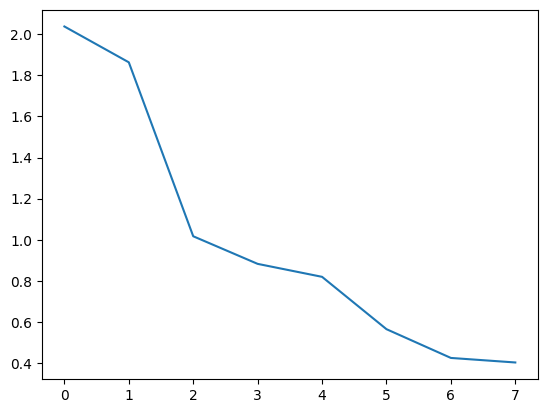

In [792]:
# cumsum을 y축으로 하여 plot 생성

plt.plot (eigenvalues)

line이 급격히 완만해지는 2 혹은 4가 주성분 갯수가 되는 것이 적절할 것 같다. **여기서는 주성분의 갯수를 2로 구성하겠다.**

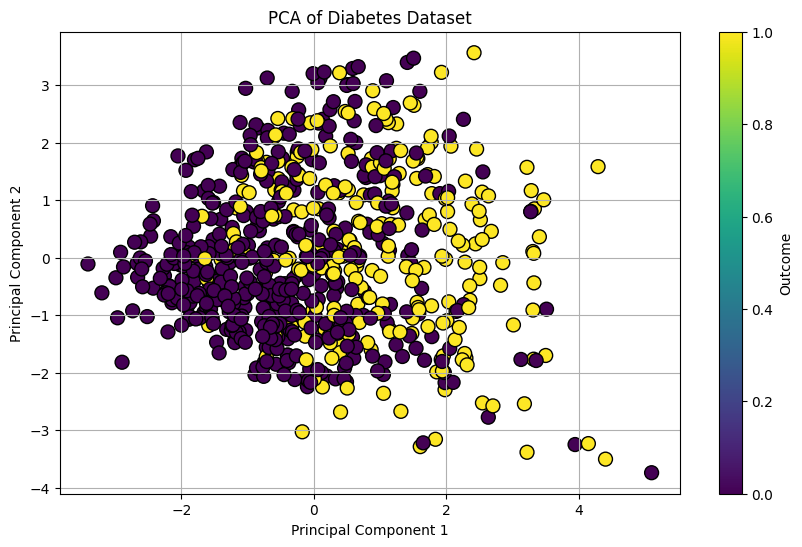

In [793]:
# pca 적용 및 시각화

pca = PCA(n_components=2)
diabetes_input_PCA = pca.fit_transform(diabetes_input_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(diabetes_input_PCA[:, 0], 
                      diabetes_input_PCA[:, 1], 
                      c=diabetes_target, 
                      cmap='viridis',
                      edgecolor='k', s=100)
plt.title('PCA of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Outcome')
plt.grid()
plt.show()

In [794]:
# train set, test set split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_input_PCA,
                                                    diabetes_target,
                                                    stratify=diabetes_target,
                                                    test_size = 0.2) 

X_train.shape, y_train.shape 

((579, 2), (579,))

In [795]:
# imbalaced-class problem을 해결하기 위하여 SMOTE 적용

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

print("Original class distribution:", y_train.value_counts())
print ()
print("Resampled class distribution:", y_resampled.value_counts())

Original class distribution: Outcome
1    380
0    380
Name: count, dtype: int64

Resampled class distribution: Outcome
1    380
0    380
Name: count, dtype: int64


In [796]:
'''
    순환 데이터를 구성하기 위하여 split_sequences를 사용하였다.
    이때, 각 window마다 class의 빈도 수를 측정하여 가장 많은 빈도수를 가진 class가 target이 되는 방식을 취하였다.
'''

from collections import Counter
import numpy as np
from collections import Counter

def split_sequences_freq(sequences, n_steps):
    X, y = list(), list()
    
    # Check if sequences is a DataFrame, convert if necessary
    if not isinstance(sequences, pd.DataFrame):
        sequences = pd.DataFrame(sequences)

    for i in range(len(sequences)):
        end_ix = i + n_steps

        if end_ix > len(sequences):
            break

        seq_x = sequences.iloc[i:end_ix, :-1].values
        seq_y = sequences.iloc[i:end_ix, -1].values   
        
        # Find the most frequent class in seq_y
        most_frequent_class = Counter(seq_y).most_common(1)[0][0]
        
        X.append(seq_x)
        y.append(int(most_frequent_class))

    return np.array(X), np.array(y)

In [797]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

print ("before : ", train_set.shape, test_set.shape)

X_train_seq, y_train_seq = split_sequences_freq(train_set, 3) # 3개씩 묶기

print ("train : ", X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences_freq(test_set, 3)

print ("test : ", X_test_seq.shape, y_test_seq.shape)

before :  (760, 3) (190, 3)
train :  (758, 3, 2) (758,)
test :  (188, 3, 2) (188,)


In [798]:
# 실제로 어떻게 구성되었는지 X_train_seq와 y_train_seq의 앞쪽 5개의 component만 출력

print (np.isnan(y_train_seq).sum())

for idx in range (5) :
    print (f"X_train_seq[{idx}] : ", X_train_seq[idx][:5])
    print (f"y_train_seq[{idx}] : ", y_train_seq[idx])
    
    if idx == 0 : 
        prev = X_train_seq[idx]
        print()
        continue

    if (prev[1:] == X_train_seq[idx][:-1]).all() : 
        '''
            step 1씩 이동했으니깐, 이전 X_train_seq 원소의 2번째 record ~ 마지막번째 record와
            현재 X_train_seq 원소의 첫번째 record ~ 마지막-1번째 record는 같을 수밖에 없습니다.
        '''
         
        print ("window가 step 1씩 이동하면서 순환 데이터를 만듦")
    
    prev = X_train_seq[idx]
    print()

0
X_train_seq[0] :  [[-1.02973377  0.05904099]
 [ 2.28369894 -0.0761576 ]
 [ 2.29679403 -1.74418383]]
y_train_seq[0] :  1

X_train_seq[1] :  [[ 2.28369894 -0.0761576 ]
 [ 2.29679403 -1.74418383]
 [-1.9652474   0.02998112]]
y_train_seq[1] :  1
window가 step 1씩 이동하면서 순환 데이터를 만듦

X_train_seq[2] :  [[ 2.29679403 -1.74418383]
 [-1.9652474   0.02998112]
 [ 1.21650904  1.40835448]]
y_train_seq[2] :  0
window가 step 1씩 이동하면서 순환 데이터를 만듦

X_train_seq[3] :  [[-1.9652474   0.02998112]
 [ 1.21650904  1.40835448]
 [-0.037698    0.56130899]]
y_train_seq[3] :  0
window가 step 1씩 이동하면서 순환 데이터를 만듦

X_train_seq[4] :  [[ 1.21650904  1.40835448]
 [-0.037698    0.56130899]
 [ 0.63377069 -0.36331244]]
y_train_seq[4] :  0
window가 step 1씩 이동하면서 순환 데이터를 만듦



In [799]:
# one-hot encoding 

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

y_train_seq_encoded = to_categorical(y_train_seq)
y_test_seq_encoded = to_categorical(y_test_seq)

print (y_train[:5])
print (y_train_encoded[:5])

print (y_test[:5])
print (y_test_encoded[:5])

print(y_train_seq[:5])  
print(y_train_seq_encoded[:5]) 

print(y_test_seq[:5])  
print(y_test_seq_encoded[:5]) 

0    1
1    1
2    1
3    0
4    0
Name: Outcome, dtype: int64
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[1 1 0 0 0]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[1 1 1 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


----

### 3. 다양한 모델을 통한 학습

- 아래에 있는 모델을 통하여 학습한다.
    - SVM
    - random forest
    - XGBoost
    - DNN
    - CNN(Recurrence)
    - U-net
- 마지막에 각 모델의 score를 비교하는 작업까지 수행한다. 더불어서, 각 모델에 있는 핵심 원리를 작성한다. (복습 용도로)

#### 3-1. SVM (Support Vector Machine)

<img src="https://blog.kakaocdn.net/dn/dyU2w7/btqNe5n7NPN/0KrOvyF6RM8jYOTHwOYIv0/img.png" width="500px">

- SVM은 이중 분류에 특화되어 있으면서, 각 class를 잘 분류 가능한 hyperplane을 찾는 알고리즘임
- SVM 원리
    - 결정 경계를 찾는데, 결정 경계 주변에 있는 support vector와의 거리인 margin을 최대화할 수 있는 plane을 찾는 것
    - 차원 (즉 feature)가 늘어날 수록 어려우며, 위는 2차원이니 선형함수로 hyperplane을 찾은 거지만, n차원이면 n-1차원의 함수를 사용하여 plane을 찾아야 함
- SVM 종류
    - 선형 SVM 
        - soft margin : 오차를 어느 정도 허용하여, margin 안에 instance가 들어가도 됨
        - hard margin : margin 안에 instance를 절대로 허용하지 않음
        - C값을 조정하여 soft margin or hard margin을 선정
            - C가 커지면 overfitting될 가능성 높아짐
            - C가 작아지면 경계가 흐려져 underfitting될 가능성 높아짐
    - 비선형 SVM 
        - 비선형적이다 -> 차원을 한 단계 늘려서 classification하면 됨 -> 그러면 mapping function 사용해야함 -> 계산량 많아짐 -> "kernel" 사용 (실질적으로 차원을 늘리지 않고, 차원을 늘리는 것처럼 계산해줌)
        - kernel의 종류
            - RBF
                - gamma 파라미터가 생김 (기존 C에 추가)
                    - 전제 : 비선형 SVM이기 때문에 결정 경계에 곡률이 존재할 것
                    - gamma가 커지면 곡률이 커지면서 overfitting될 가능성 높아짐
                    - 작으면 곡률이 작아지면서 underfitting될 가능성 높아짐
            - sigmoid
            - polynormial
            
여기서는 가우시안 RBF를 kernel로 사용하고, 적절한 C값과 gamma를 찾기 위해 random search를 진행한다. 그리드는 아래와 같이 정의한다
- C : 0.1부터 20.0까지 uniform
- gamma : 0.1부터 20.0까지 uniform
- epoch는 100번, 모든 코어를 가동

In [800]:
# random search 통하여 최적의 hyperparameter 

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

param_grid = {
    'C' : uniform(0.1, 20.0), 
    'gamma' : uniform(0.1, 20.0)
}

svm = svm.SVC(kernel='rbf')

rs = RandomizedSearchCV(svm, param_grid, n_iter=100, n_jobs=-1) # core 전부 돌리기, epoch 100번
rs.fit (X_train, y_train)

print ("best parameter : ", rs.best_params_)
print ("validation score : ", np.max(rs.cv_results_['mean_test_score'])) # 최상의 교차 검증 점수
print ("best model : ", rs.best_estimator_) 

svm = rs.best_estimator_

print ('train score : ', svm.score(X_train, y_train))
print ('test score : ', svm.score(X_test, y_test))

best parameter :  {'C': 17.144532201620873, 'gamma': 1.3209625883847798}
validation score :  0.7618421052631579
best model :  SVC(C=17.144532201620873, gamma=1.3209625883847798)
train score :  0.7960526315789473
test score :  0.7263157894736842


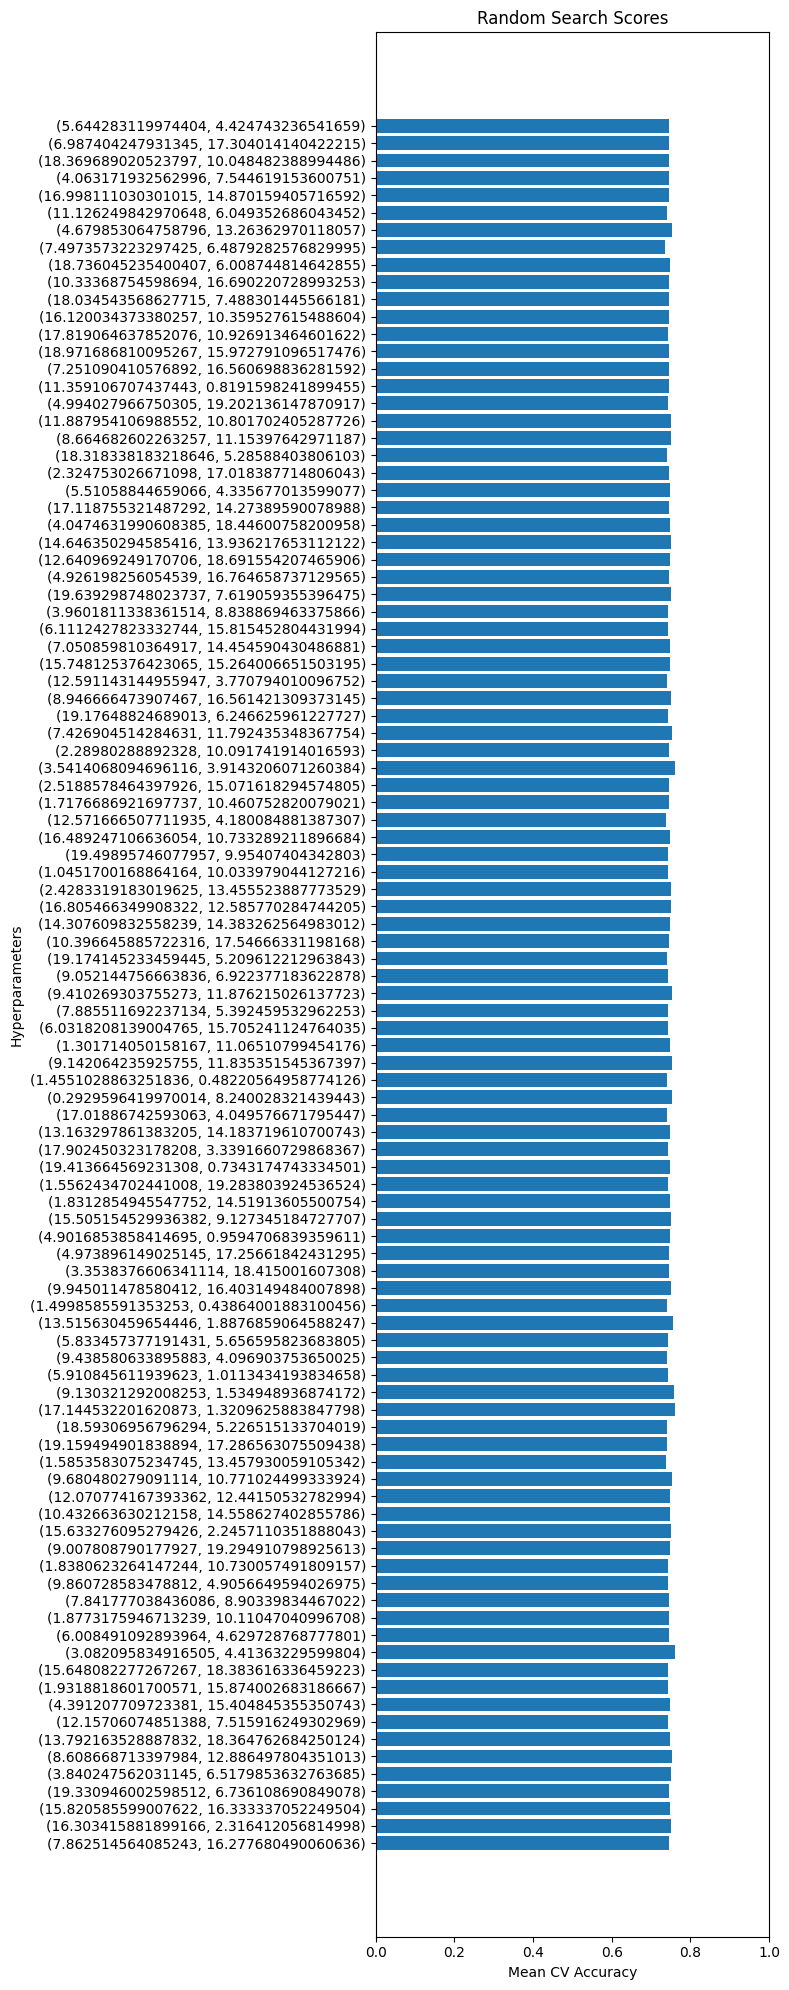

In [801]:
# 하이퍼파라미터 조합별 성능 시각화

# 각 하이퍼파라미터 조합별 교차 검증 스코어 가져오기
results = rs.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# 시각화를 위한 데이터 준비
C_values = [params[i]['C'] for i in range(len(params))]
gamma_values = [params[i]['gamma'] for i in range(len(params))]

# 가로 방향으로 막대 그래프로 교차 검증 스코어 시각화
fig, ax = plt.subplots(figsize=(8, 20))
bars = ax.barh(range(len(mean_scores)), mean_scores, tick_label=[f"({C}, {gamma})" for C, gamma in zip(C_values, gamma_values)])
ax.set_ylabel('Hyperparameters')
ax.set_xlabel('Mean CV Accuracy')
ax.set_title('Random Search Scores')
plt.xlim([0, 1])  # x 축 범위 설정 (필요에 따라 조정 가능)
plt.tight_layout()
plt.show()

report :
               precision    recall  f1-score   support

           0       0.69      0.74      0.72        89
           1       0.76      0.71      0.73       101

    accuracy                           0.73       190
   macro avg       0.73      0.73      0.73       190
weighted avg       0.73      0.73      0.73       190

[[66 23]
 [29 72]]


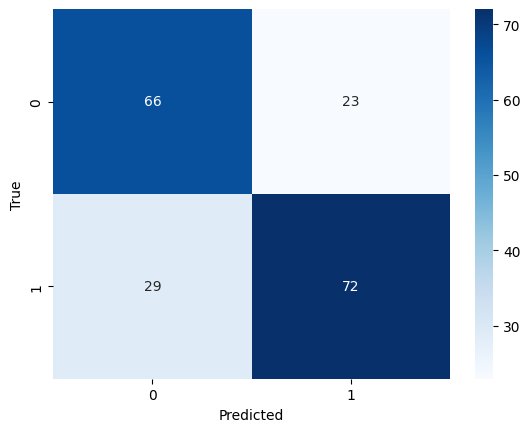

In [802]:
# report 및 confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

y_pred = svm.predict(X_test)

print("report :\n", classification_report(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)

print (cm)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

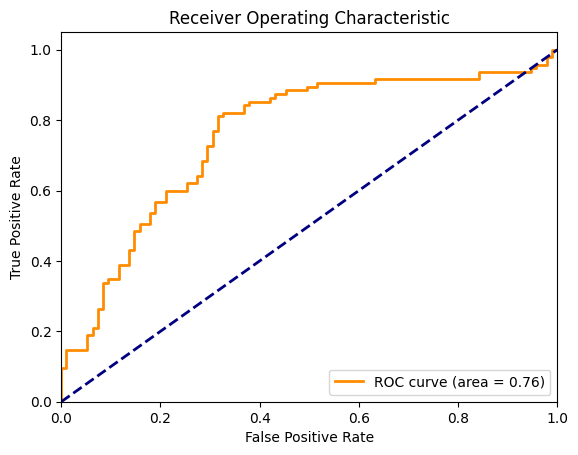

In [803]:
# ROC 곡선

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [804]:
# evalutation

score_SVM = svm.score(X_test, y_test) # accuracy
print (score_SVM)

0.7263157894736842


<br>

#### 3-2. random forest

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FZK4N6%2FbtqFNaJzPjg%2FsukopDLDuKSIymy2KWPAYk%2Fimg.png" width="500px">

- random으로 feature를 선정해 node로 지정 후 분기할 때마다 DT와 같은 방식으로 분기해 나가는 weaker learner를 만들어 비교 후, 다수결의 원칙에 따라 가장 많은 category로 예측   

- tree를 이용한 가장 확실하고 효과적인 방법, 일반적으로 decision tree보다 train score가 높다.

- 구성원리 
    - bootstrap sampling : 각각의 weaker learner를 만들기 위해 사용, feature을 복원 추출하고, 그 feature 안에서도 복원 추출하는 방법
    - 다음 분기를 고를 때에도 랜덤하게 뽑음
    - OOB 검증 : 확실히 "복원 추출" 이기 때문에 봅히지 않은 샘플도 생기니, 이를 OOB에 넣어 validation test를 진행 (재활용성을 높인다)

In [805]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True) # OOB validation test 진행
rf.fit (X_train, y_train)

print ('train score : ', rf.score(X_train , y_train))
print ('test score : ', rf.score(X_test , y_test))
print ('feature importance : ', rf.feature_importances_)

train score :  1.0
test score :  0.6684210526315789
feature importance :  [0.60766387 0.39233613]


report :
               precision    recall  f1-score   support

           0       0.71      0.66      0.68       102
           1       0.63      0.68      0.66        88

    accuracy                           0.67       190
   macro avg       0.67      0.67      0.67       190
weighted avg       0.67      0.67      0.67       190

[[67 35]
 [28 60]]


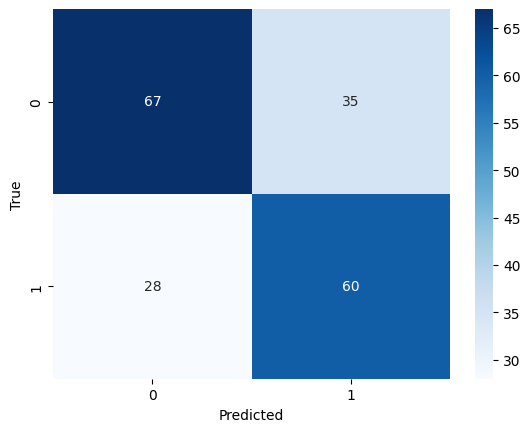

In [806]:
# report 및 confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("report :\n", classification_report(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)

print (cm)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

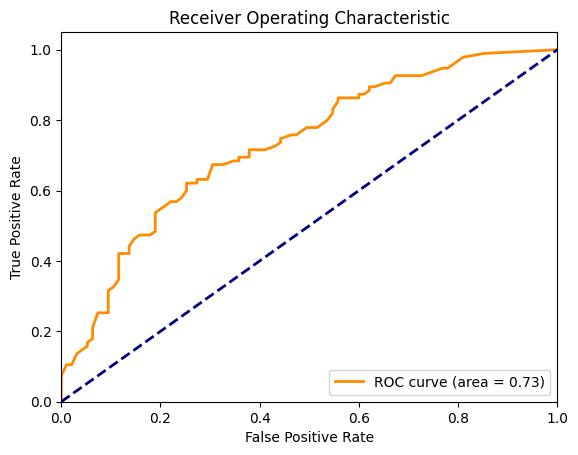

In [807]:
# ROC 곡선

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [808]:
# evalutation

score_RF = rf.score(X_test, y_test) # accuracy
print (score_RF)

0.6684210526315789


----

#### 3-3. XGboost

<img src="https://blog.kakaocdn.net/dn/djZuBw/btsl0ULTIYC/v2juMput9ivs4Cv2wKG8nK/img.png">

- XGBoost는 Gradient Boosting 알고리즘을 기반으로 한 결정 트리 앙상블 모델이다. 주로 분류와 회귀 문제에 사용됨

- **구성 원리**
    - **Boosting**: 여러 약한 학습기를 순차적으로 학습하여 성능을 향상시킨다.
    - **Gradient Descent**: 손실 함수를 최소화하기 위해 경량화된 그래디언트 하강법을 사용한다.
    - **Regularization**: L1 및 L2 정규화를 통해 과적합을 방지한다.
    - **Tree Pruning**: 후방 가지치기를 통해 불필요한 분기를 제거한다.
    - **OOB Validation**: 사용되지 않은 샘플로 검증하여 모델의 재활용성을 높인다.

- **장점** : 높은 예측 성능, 빠른 학습 속도, 과적합 방지 기능, 병렬 처리 지원.

- **결론** : XGBoost는 다양한 데이터 문제에 효과적인 강력한 모델이다.

In [809]:
import xgboost as xgb

boost = xgb.XGBClassifier(random_state=42)
boost.fit(X_train, y_train)

print ('train score : ', boost.score(X_train , y_train))
print ('test score : ', boost.score(X_test , y_test))
print ('feature importance : ', boost.feature_importances_)

train score :  0.9736842105263158
test score :  0.7105263157894737
feature importance :  [0.61844957 0.3815505 ]


report :
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       104
           1       0.66      0.73      0.70        86

    accuracy                           0.71       190
   macro avg       0.71      0.71      0.71       190
weighted avg       0.72      0.71      0.71       190

[[72 32]
 [23 63]]


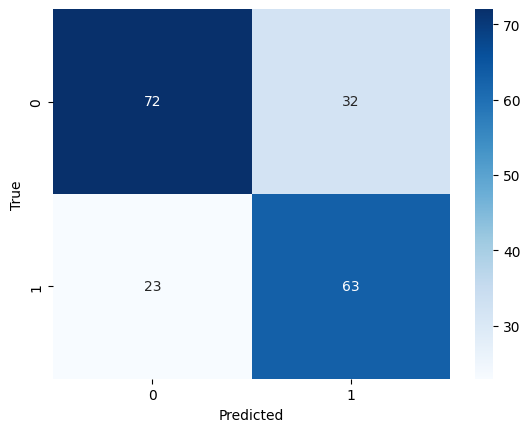

In [810]:
# report 및 confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

y_pred = boost.predict(X_test)

print("report :\n", classification_report(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)

print (cm)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

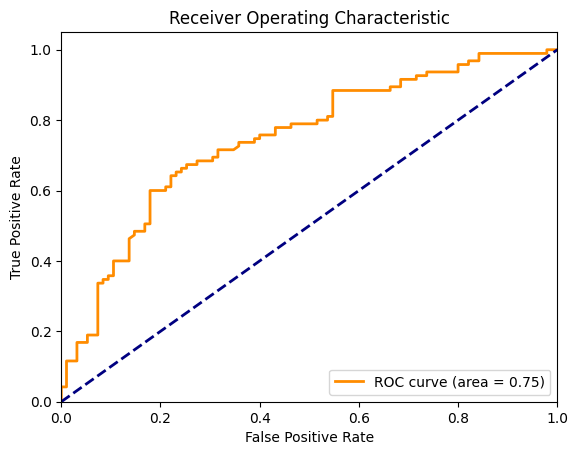

In [811]:
# ROC 곡선

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = boost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [812]:
# evalutation

score_boost = boost.score(X_test, y_test) # accuracy
print (score_boost)

0.7105263157894737


#### 3-4. DNN

- hidden layer을 적당히 구성하여 신경망을 struction할 것임
    - parameter는 최소한 3000개 이상으로 증폭, 각 node의 activation은 relu 사용
    - epoch는 50으로 고정
- 아래와 같이 experiment할 예정이다.
    - optimizer는 **적응형 학습율 optimizer인 adam을 사용한다.**
    - validation loss 감소를 위하여 **dropout 층을 추가 후, callback으로 early stopping을 도입**한다.
        - patiences는 5로 한다.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_35 (Flatten)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050 (4.10 KB)

 Trainable params: 1,050 (4.10 KB)

 Non-trainable params: 0 (0.00 B)

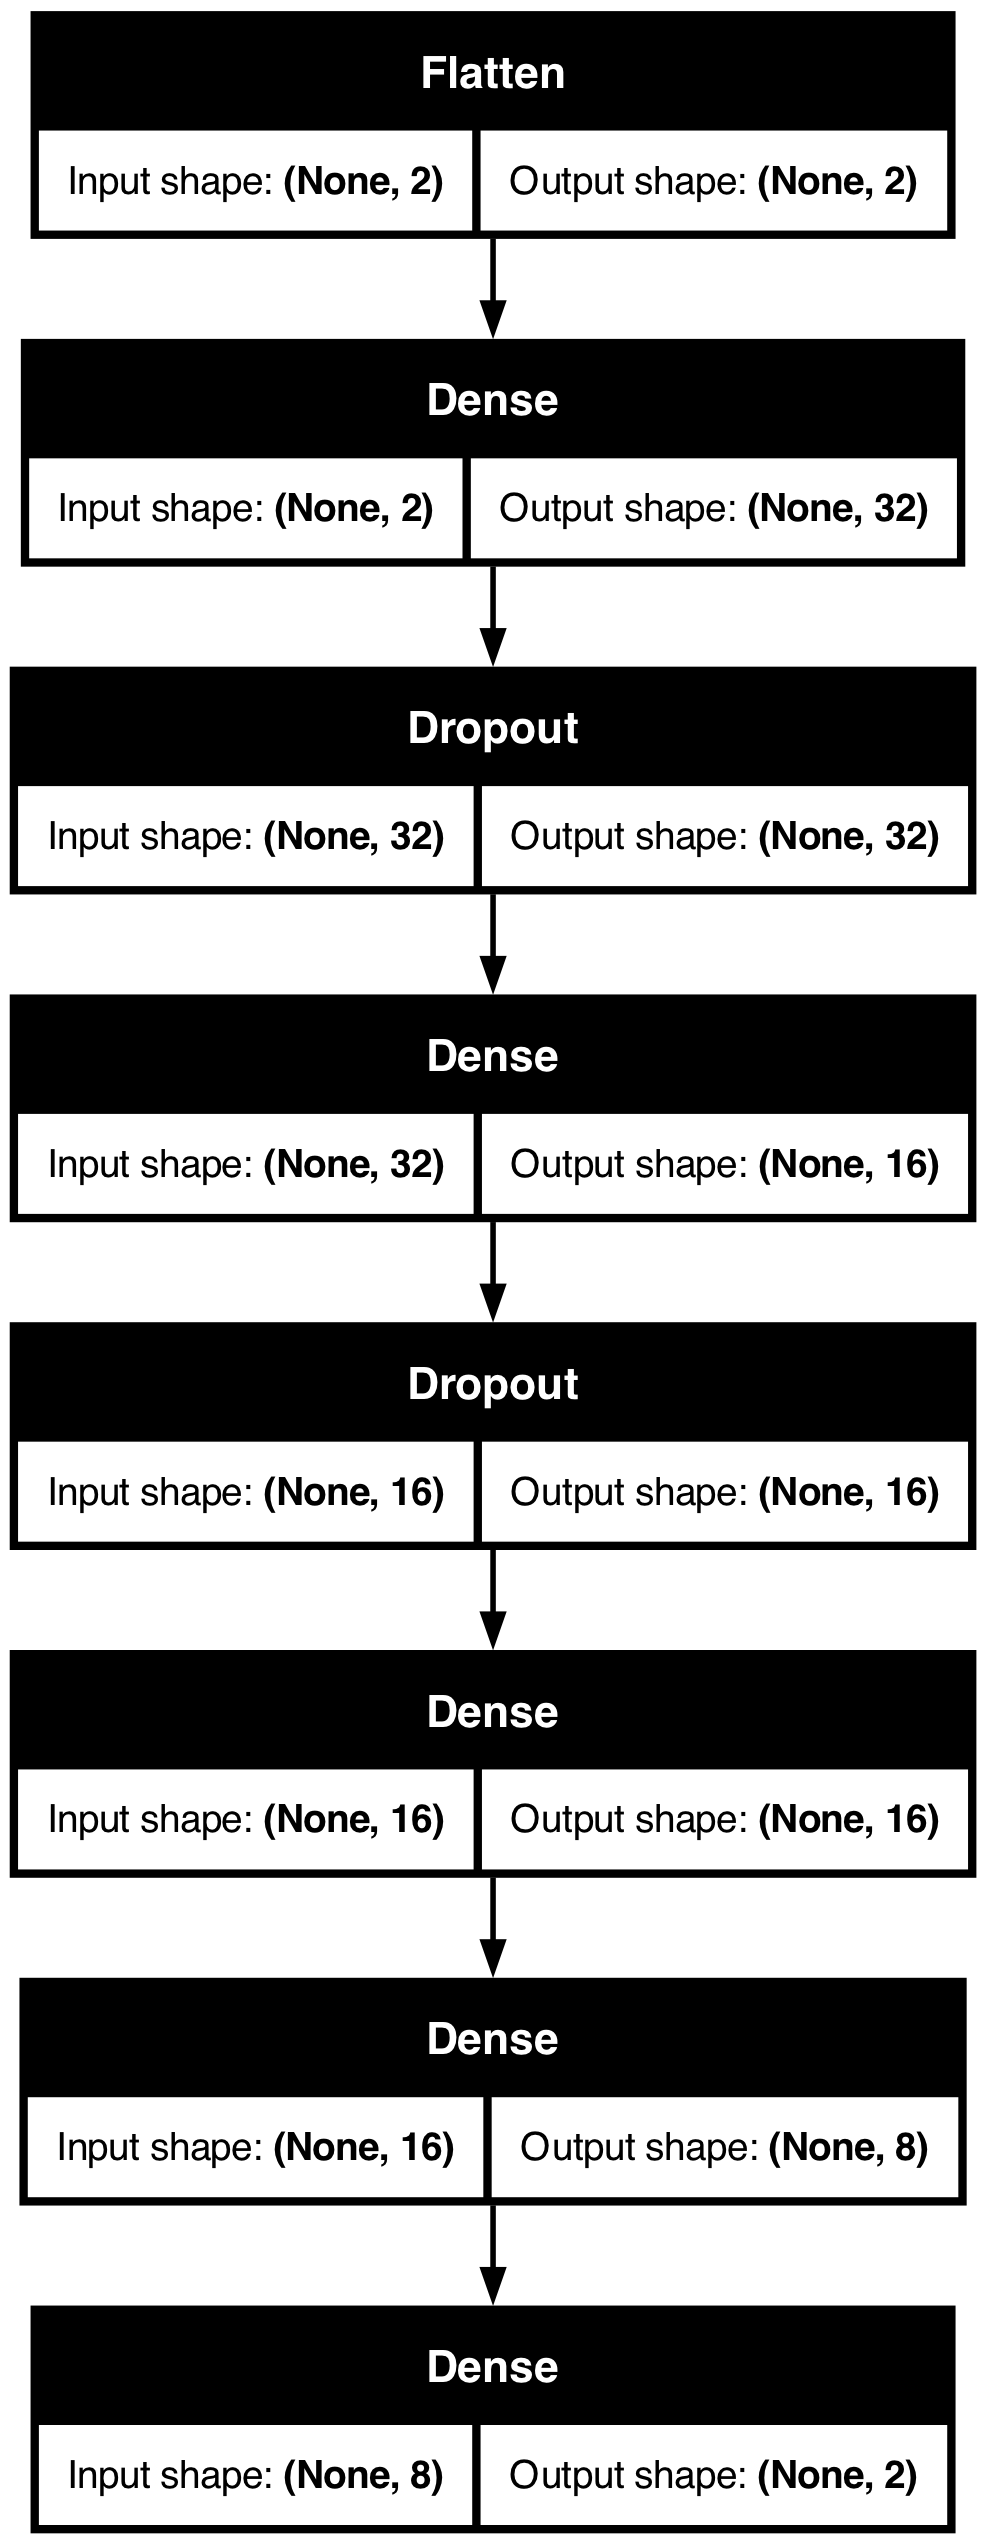

In [816]:
# modelling DNN

dnn = keras.Sequential([
    keras.layers.Flatten(input_shape=(2, )), 
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

dnn.summary()
keras.utils.plot_model(dnn, show_shapes=True)

In [817]:
# compile

adam = keras.optimizers.Adam()
dnn.compile(optimizer=adam, 
              loss='binary_crossentropy', metrics=['accuracy'])

In [819]:
# callback 설정 및 fit

early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, 
                                                 restore_best_weights=True)

history = dnn.fit(X_train, y_train_encoded, epochs=50, 
                    validation_split=0.2, verbose=True, 
                    callbacks=early_stopping_cb)

print (history.history)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7423 - loss: 0.5076 - val_accuracy: 0.6711 - val_loss: 0.6552
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.5435 - val_accuracy: 0.6645 - val_loss: 0.6702
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6929 - loss: 0.5315 - val_accuracy: 0.6645 - val_loss: 0.6744
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7294 - loss: 0.5123 - val_accuracy: 0.6579 - val_loss: 0.6846
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7243 - loss: 0.5209 - val_accuracy: 0.6579 - val_loss: 0.6807
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7393 - loss: 0.5002 - val_accuracy: 0.6579 - val_loss: 0.6768
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7751 - loss: 0.5057 - val_accuracy: 0.6579 - val_loss: 0.6583
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7572 - loss: 0.5019 - val_accuracy: 0.6579 - val_loss:

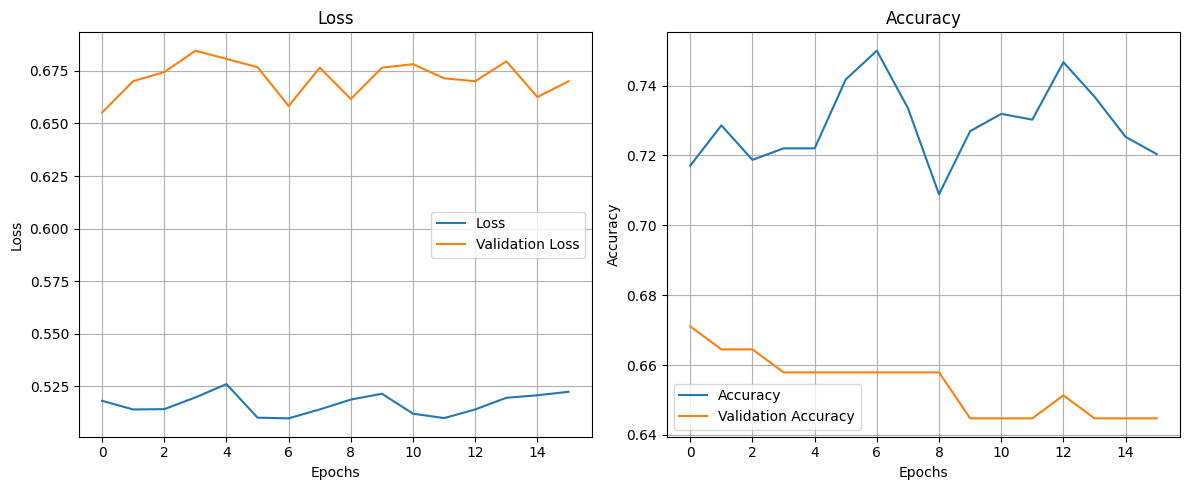

In [820]:
# loss와 validation loss, acc와 validation acc를 시각화하기 위한 메소드

def draw_history (history) :
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(history.history['loss'], label='Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].grid()

    ax[1].plot(history.history['accuracy'], label='Accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    ax[1].grid()

    plt.tight_layout()
    plt.show()

draw_history(history)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
y_test shape: (190,)
report :
               precision    recall  f1-score   support

           0       0.67      0.82      0.74        95
           1       0.77      0.60      0.67        95

    accuracy                           0.71       190
   macro avg       0.72      0.71      0.71       190
weighted avg       0.72      0.71      0.71       190

[[78 17]
 [38 57]]


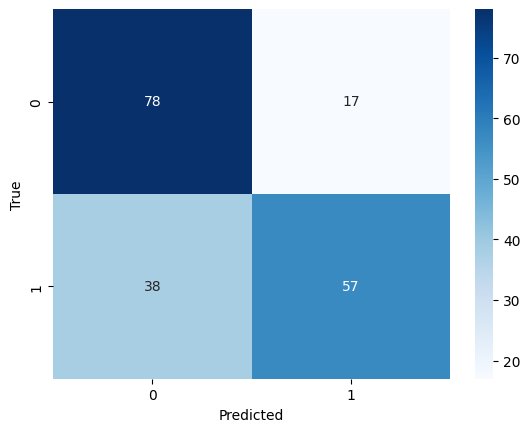

In [821]:
# report 및 confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 결과
y_pred = dnn.predict(X_test)

# 예측 결과와 실제 값을 클래스 레이블로 변환
y_pred_labels = np.argmax(y_pred, axis=1)  # 예측된 클래스 레이블

# y_test의 차원 확인
print("y_test shape:", y_test.shape)

# y_test의 원핫 인코딩 형식에서 클래스 레이블로 변환
if len(y_test.shape) == 1:  # y_test가 이미 1D인 경우
    y_test_labels = y_test.values  # 레이블 그대로 사용
else:  # y_test가 원핫 인코딩된 2D인 경우
    y_test_labels = np.argmax(y_test.values, axis=1)  # 실제 클래스 레이블

# classification report 및 confusion matrix
print("report :\n", classification_report(y_test_labels, y_pred_labels))
cm = confusion_matrix(y_test_labels, y_pred_labels)

print(cm)

# confusion matrix 시각화
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


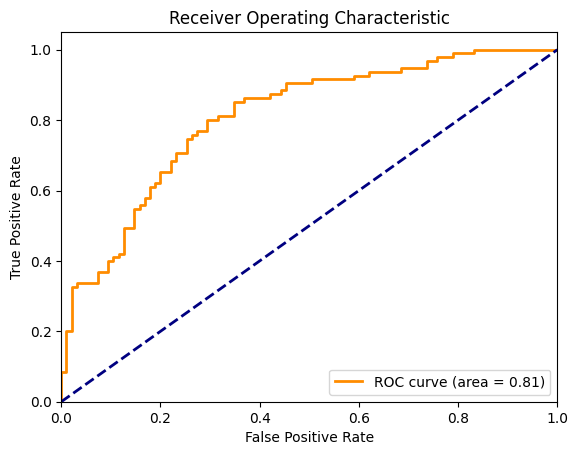

In [822]:
# ROC 곡선

from sklearn.metrics import roc_curve, auc

if len(y_test.shape) > 1:
    y_test_labels = np.argmax(y_test.values, axis=1)
else:
    y_test_labels = y_test.values

y_prob = dnn.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_labels, y_prob[:, 1])  # 클래스 1의 확률 사용
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [823]:
# evalutation

score_dnn = dnn.evaluate(X_test, y_test_encoded)[1] # accuracy
print (score_dnn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5179 
0.7105262875556946


#### 3-5. CNN

- **reference : https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/**

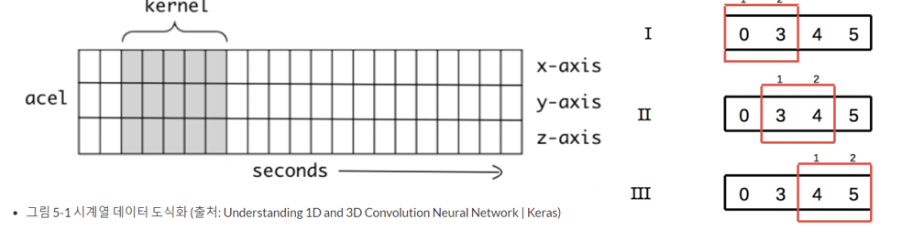

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)     │ (None, 3, 2)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_70 (Conv1D)              │ (None, 2, 2)           │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 2, 2)           │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 2, 2)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 1, 2)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_36 (Flatten)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 640 (2.50 KB)

 Non-trainable params: 4 (16.00 B)

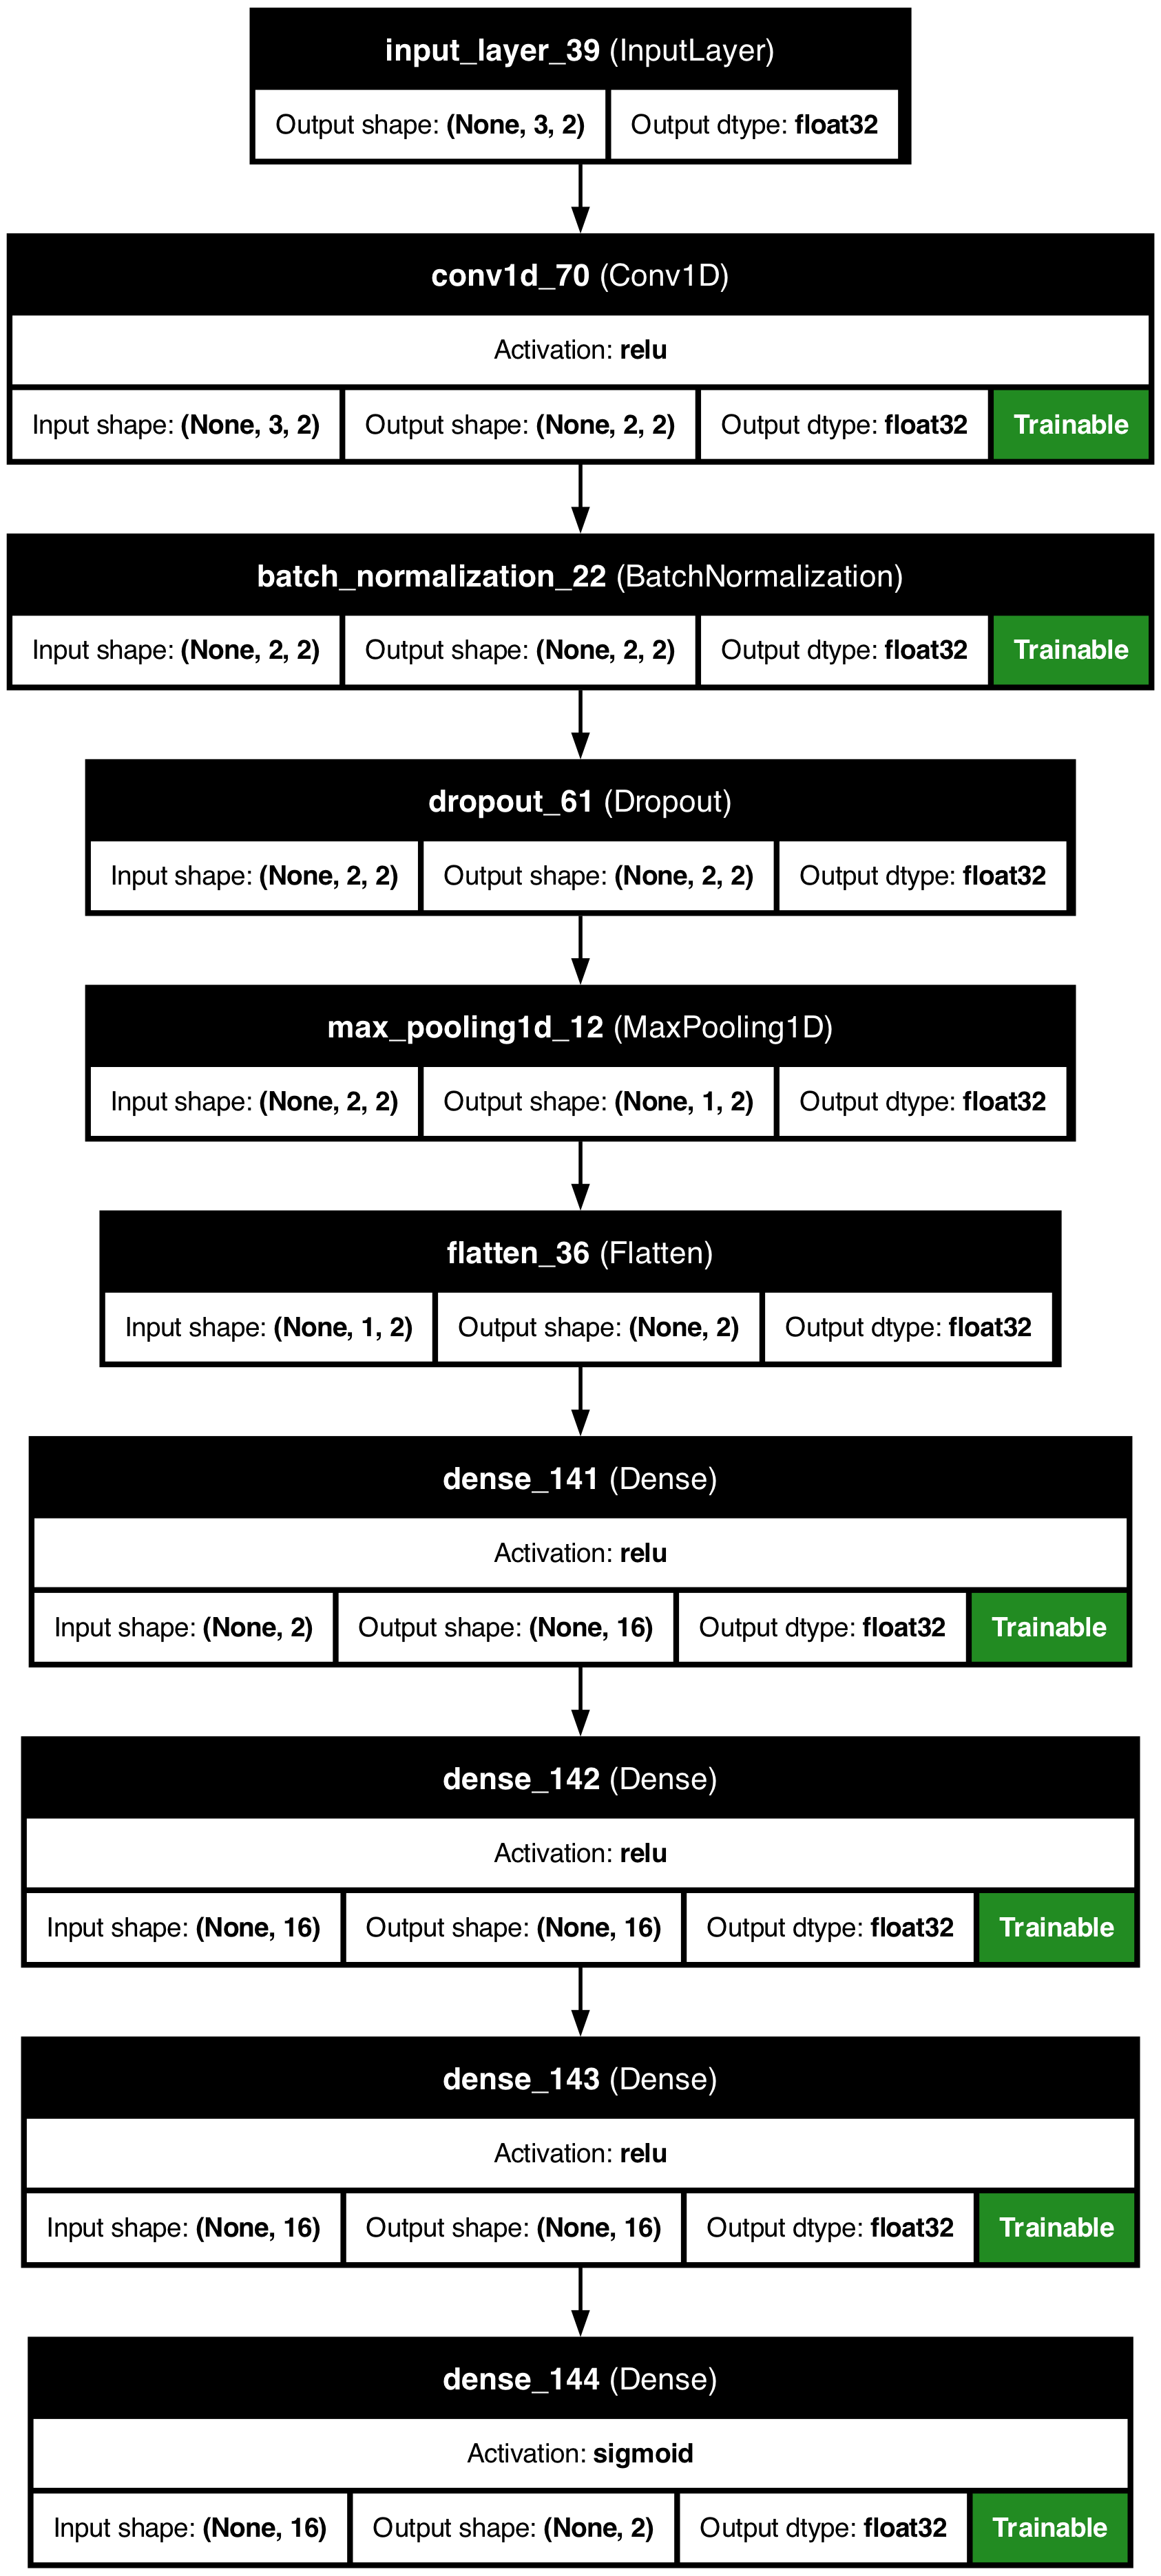

In [824]:
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense, Input, BatchNormalization, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

def make_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=2, kernel_size=2, activation='relu')(input_layer)
    batch_norm1 = BatchNormalization()(conv1)
    dropout1 = Dropout(0.2)(batch_norm1)
    pooling1 = MaxPooling1D(pool_size=2)(dropout1)

    flat = Flatten()(pooling1)
    
    dense1 = Dense(16, activation='relu')(flat)
    dense2 = Dense(16, activation='relu')(dense1)
    dense3 = Dense(16, activation='relu')(dense2)

    output_layer = Dense(2, activation='sigmoid')(dense3)
    
    model = Model(inputs=input_layer, outputs=output_layer)

    return model

cnn = make_model(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

cnn.summary()

plot_model(cnn, 
           show_shapes=True, show_layer_activations=True, 
           show_dtype=True, show_layer_names=True, show_trainable=True)


In [825]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.001)
cnn.compile (optimizer=optimizer, 
               loss='binary_crossentropy', 
               metrics=['accuracy'])

In [826]:
# fit

from memory_profiler import profile

@profile # 메모리 오버플로우로 인한 시스템 다운을 막기 위해서
def train_model(model, X_train_seq, y_train_seq) :
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
    
    history = model.fit(X_train_seq, y_train_seq, epochs=100, 
                        validation_split=0.1,
                        batch_size=32,
                        callbacks=[early_stopping_cb], 
                        verbose=True, shuffle=True)
    
    return history

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])  # (n_steps, 특징 수)
history = train_model(cnn, X_train_seq, y_train_seq_encoded)

ERROR: Could not find file /var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_38153/3751411045.py
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6135 - loss: 0.6902 - val_accuracy: 0.0000e+00 - val_loss: 0.7508
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6042 - loss: 0.6755 - val_accuracy: 0.0000e+00 - val_loss: 0.7658
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6237 - loss: 0.6587 - val_accuracy: 0.0000e+00 - val_loss: 0.7790
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6286 - loss: 0.6468 - val_accuracy: 0.0000e+00 - val_loss: 0.7897
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5972 - loss: 0.6451 - val_accuracy: 0.0000e+00 - val_loss: 0.7974
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6368 - loss: 0.6304 - val_accuracy: 0.3158 - val_loss: 0.7916
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6809 - loss: 0.6074 - val_accuracy: 0.4868 - v

Epoch 51/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6883 - loss: 0.5863 - val_accuracy: 0.7105 - val_loss: 0.6281
Epoch 52/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7276 - loss: 0.5467 - val_accuracy: 0.7105 - val_loss: 0.6191
Epoch 53/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.5782 - val_accuracy: 0.7105 - val_loss: 0.5888
Epoch 54/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7092 - loss: 0.5843 - val_accuracy: 0.7105 - val_loss: 0.6106
Epoch 55/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7194 - loss: 0.5790 - val_accuracy: 0.7105 - val_loss: 0.6080
Epoch 56/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7218 - loss: 0.5441 - val_accuracy: 0.7105 - val_loss: 0.6097
Epoch 57/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6950 - loss: 0.5749 - val_accuracy: 0.7105 - val_loss: 0.6052
Epoch 58/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7138 - loss: 0.5733 - val_accuracy: 0.

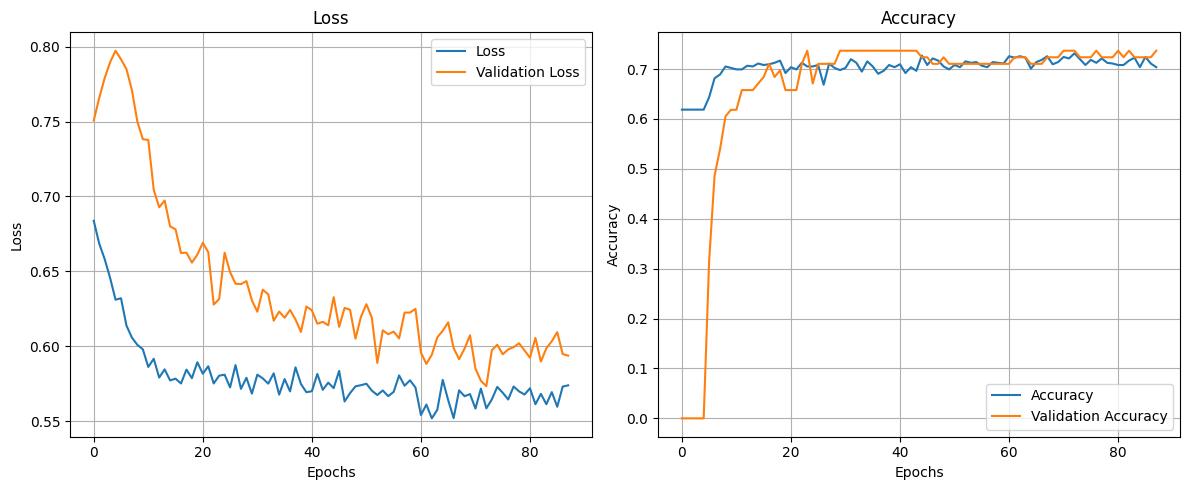

In [827]:
# loss와 validation loss, acc와 validation acc를 시각화

draw_history(history)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix


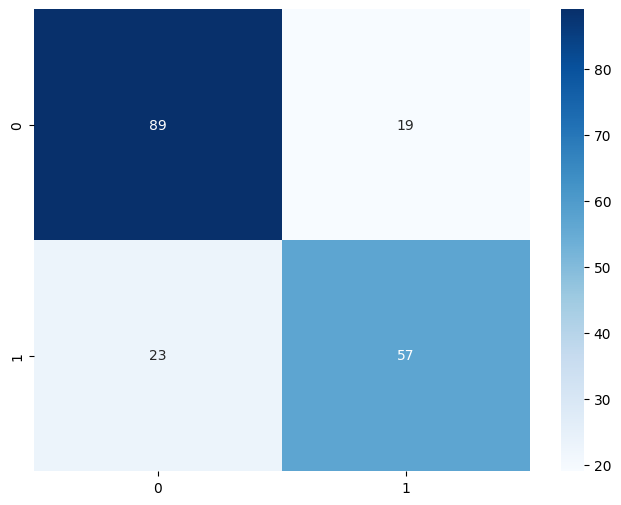

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       108
           1       0.75      0.71      0.73        80

    accuracy                           0.78       188
   macro avg       0.77      0.77      0.77       188
weighted avg       0.78      0.78      0.78       188



In [828]:
# confusion matrix, classification report, accuracy

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_test_arg = np.argmax(y_test_seq_encoded, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print ('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

# classification report
report = classification_report(y_test_arg, Y_pred)
print (report)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


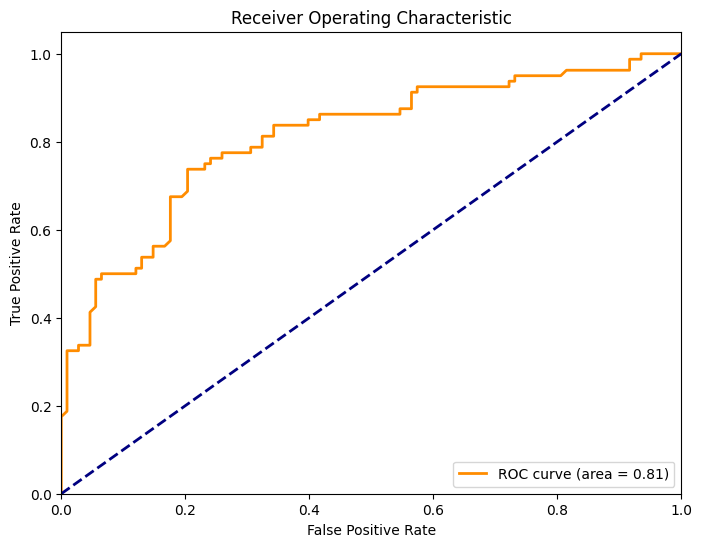

In [829]:
# ROC 곡선

from sklearn.metrics import roc_curve, roc_auc_score

y_test_pred_proba = cnn.predict(X_test_seq)
fpr, tpr, thresholds = roc_curve(y_test_seq, y_test_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test_seq, y_test_pred_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [830]:
# evalutation

score_cnn = cnn.evaluate(X_test_seq, y_test_seq_encoded)[1] # accuracy
print (score_cnn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7826 - loss: 0.4722 
0.7180851101875305


#### 3-6. U-Net

- U-Net은 원래 이미지 분할을 위해 설계된 합성곱 신경망(CNN)이지만, 시계열 데이터와 같은 데이터에도 적용할 수 있다.
- X_train_scaled를 conv1D에 대입 가능한 3차원 데이터로 reshape 후에 대입한다.
- **encoder** 
    - input의 important feature를 캡처하기 위해 여러 개의 합성곱 층과 맥스풀링 층으로 구성됨
    - 이 과정에서 입력 데이터는 다운샘플링되며, 특징 맵의 크기가 점점 줄어듬
    - 예시
      ```python
      conv_1 = keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
      pooling_1 = keras.layers.MaxPooling1D(2)(conv_1)
      dropout_1 = keras.layers.Dropout(0.3)(pooling_1)

      conv_2 = keras.layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(dropout_1)
      pooling_2 = keras.layers.MaxPooling1D(2)(conv_2)
      dropout_2 = keras.layers.Dropout(0.3)(pooling_2)
      ```

- **decoder**
    - 이 경로는 업샘플링과 합성곱 층을 통해 원본 데이터의 해상도를 복원함
    - 수축 경로에서 얻은 특징을 결합하여 최종 출력 이미지를 생성함.
    - 예시
      ```python
      conv_3 = keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(dropout_2)
      upsampling_1 = keras.layers.UpSampling1D(2)(conv_3)
      ```

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_48      │ (None, 3, 2)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_167 (Conv1D) │ (None, 3, 128)    │        896 │ input_layer_48[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_168 (Conv1D) │ (None, 3, 128)    │     49,280 │ conv1d_167[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_169 (Conv1D) │ (None, 2, 128)    │     49,280 │ conv1d_168[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_170 (Conv1D) │ (None, 2, 64)     │     24,640 │ conv1d_169[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_171 (Conv1D) │ (None, 2, 64)     │     12,352 │ conv1d_170[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_172 (Conv1D) │ (None, 1, 64)     │     12,352 │ conv1d_171[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_173 (Conv1D) │ (None, 1, 32)     │      6,176 │ conv1d_172[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_174 (Conv1D) │ (None, 1, 32)     │      3,104 │ conv1d_173[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_175 (Conv1D) │ (None, 1, 32)     │      3,104 │ conv1d_174[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_176 (Conv1D) │ (None, 1, 16)     │      1,552 │ conv1d_175[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_177 (Conv1D) │ (None, 1, 16)     │        784 │ conv1d_176[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_transpose_27 │ (None, 2, 32)     │      1,056 │ conv1d_177[0][0]  │
│ (Conv1DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cropping1d_7        │ (None, 1, 32)     │          0 │ conv1d_transpose… │
│ (Cropping1D)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_27      │ (None, 1, 64)     │          0 │ cropping1d_7[0][… │
│ (Concatenate)       │                   │            │ conv1d_174[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_178 (Conv1D) │ (None, 1, 32)     │      6,176 │ concatenate_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_179 (Conv1D) │ (None, 1, 32)     │      3,104 │ conv1d_178[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_transpose_28 │ (None, 2, 64)     │      4,160 │ conv1d_179[0][0]  │
│ (Conv1DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_28      │ (None, 2, 128)    │          0 │ conv1d_transpose… │
│ (Concatenate)       │                   │            │ conv1d_171[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_180 (Conv1D) │ (None, 2, 64)     │     24,640 │ concatenate_28[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_181 (Conv1D) │ (None, 2, 64)     │     12,352 │ conv1d_180[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_transpose_29 │ (None, 4, 128)    │     16,512 │ conv1d_181[0][0]

 Total params: 379,504 (1.45 MB)

 Trainable params: 379,504 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

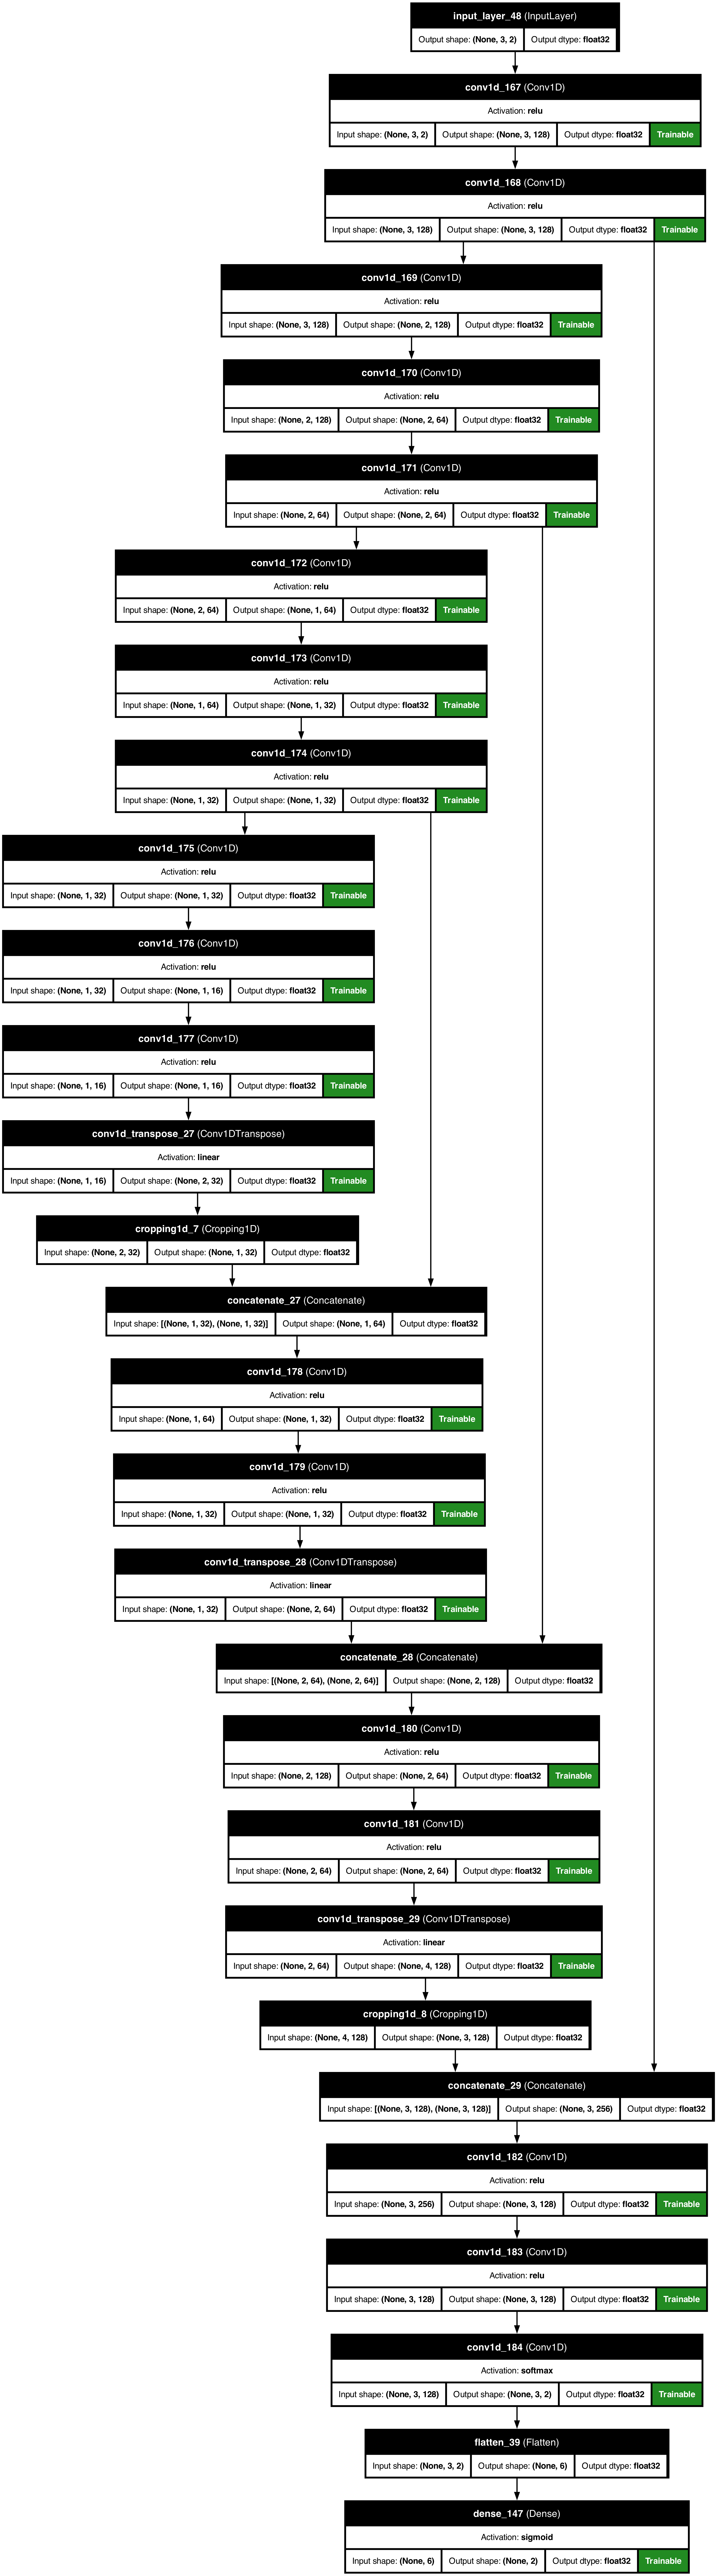

In [840]:
from tensorflow.keras import layers, models

def unet_1d_custom(input_shape, num_classes) :
    inputs = layers.Input(shape=input_shape)
    
    # 인코더
    c1 = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(c1)
    p1 = layers.Conv1D(128, kernel_size=3, strides=2, activation='relu', padding='same')(c1)  # 다운샘플링

    c2 = layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(p1)
    c2 = layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(c2)
    p2 = layers.Conv1D(64, kernel_size=3, strides=2, activation='relu', padding='same')(c2)  # 다운샘플링

    c3 = layers.Conv1D(32, kernel_size=3, activation='relu', padding='same')(p2)
    c3 = layers.Conv1D(32, kernel_size=3, activation='relu', padding='same')(c3)
    p3 = layers.Conv1D(32, kernel_size=3, strides=2, activation='relu', padding='same')(c3)  # 다운샘플링

    # 보틀넥
    b1 = layers.Conv1D(16, kernel_size=3, activation='relu', padding='same')(p3)
    b1 = layers.Conv1D(16, kernel_size=3, activation='relu', padding='same')(b1)

    # 디코더
    u3 = layers.Conv1DTranspose(32, kernel_size=2, strides=2, padding='same')(b1)  # 업샘플링
    
    if u3.shape[1] != c3.shape[1] :
        diff = c3.shape[1] - u3.shape[1]
        
        if diff > 0 :
            u3 = layers.ZeroPadding1D(padding=(0, diff))(u3)
            
        else :
            u3 = layers.Cropping1D(cropping=(0, -diff))(u3)
            
    u3 = layers.concatenate([u3, c3], axis=-1)  # 인코더와 연결
    c7 = layers.Conv1D(32, kernel_size=3, activation='relu', padding='same')(u3)
    c7 = layers.Conv1D(32, kernel_size=3, activation='relu', padding='same')(c7)

    u4 = layers.Conv1DTranspose(64, kernel_size=2, strides=2, padding='same')(c7)  # 업샘플링
    if u4.shape[1] != c2.shape[1] :
        diff = c2.shape[1] - u4.shape[1]
        
        if diff > 0 :
            u4 = layers.ZeroPadding1D(padding=(0, diff))(u4)
            
        else :
            u4 = layers.Cropping1D(cropping=(0, -diff))(u4)
            
    u4 = layers.concatenate([u4, c2], axis=-1)  # 인코더와 연결
    c8 = layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(u4)
    c8 = layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(c8)

    u5 = layers.Conv1DTranspose(128, kernel_size=2, strides=2, padding='same')(c8)  # 업샘플링
    if u5.shape[1] != c1.shape[1] :
        diff = c1.shape[1] - u5.shape[1]
        
        if diff > 0 :
            u5 = layers.ZeroPadding1D(padding=(0, diff))(u5)
            
        else :
            u5 = layers.Cropping1D(cropping=(0, -diff))(u5)
            
    u5 = layers.concatenate([u5, c1], axis=-1)  # 인코더와 연결
    c9 = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(u5)
    c9 = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(c9)

    # 출력층 
    outputs = layers.Conv1D(num_classes, kernel_size=1, activation='softmax')(c9)
    outputs = layers.Flatten()(outputs)
    outputs = layers.Dense(num_classes, activation='sigmoid')(outputs)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    
    return model

# 모델 생성
input_shape = (3, 2)  
num_classes = 2
unet  = unet_1d_custom(input_shape=input_shape, num_classes=num_classes)

unet.summary()
keras.utils.plot_model(unet, show_dtype=True,
                      show_layer_activations=True,
                      show_layer_names=True,
                      show_shapes=True,
                      show_trainable=True)

In [841]:
# compile

from tensorflow.keras.losses import BinaryCrossentropy

adam = keras.optimizers.Adam()
unet.compile(optimizer=adam, 
              loss=BinaryCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [842]:
# fit

early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, 
                                                restore_best_weights=True)

history = unet.fit(X_train_seq, y_train_seq_encoded, epochs=50, 
                    validation_split=0.1, 
                    callbacks=early_stopping_cb, 
                    batch_size=32,
                    verbose=True)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6235 - loss: 0.6866 - val_accuracy: 0.6842 - val_loss: 0.6891
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7265 - loss: 0.6579 - val_accuracy: 0.5658 - val_loss: 0.7187
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7320 - loss: 0.6451 - val_accuracy: 0.4342 - val_loss: 0.7501
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6861 - loss: 0.6458 - val_accuracy: 0.6316 - val_loss: 0.7399
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7302 - loss: 0.6356 - val_accuracy: 0.7500 - val_loss: 0.7042
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7219 - loss: 0.6247 - val_accuracy: 0.7763 - val_loss: 0.7144
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7642 - loss: 0.6013 - val_accuracy: 0.8158 - val_loss: 0.6750
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7570 - loss: 0.6051 - val_accuracy: 0.7368 - v

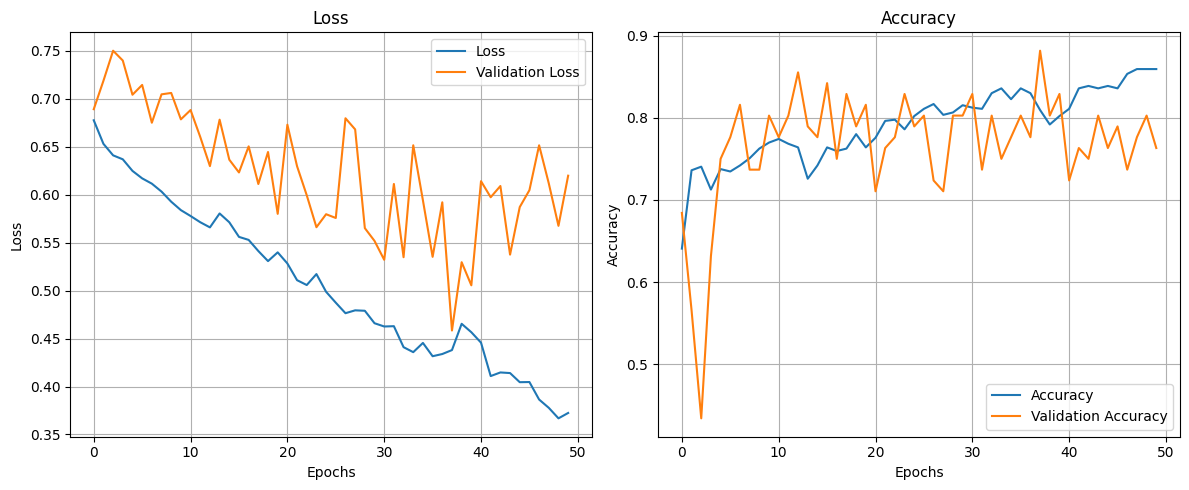

In [843]:
# loss와 validation loss, acc와 validation acc를 시각화

draw_history(history)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Confusion Matrix


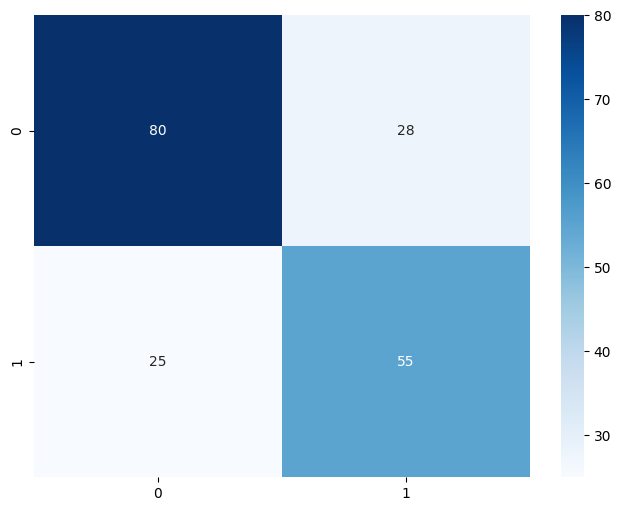

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       108
           1       0.66      0.69      0.67        80

    accuracy                           0.72       188
   macro avg       0.71      0.71      0.71       188
weighted avg       0.72      0.72      0.72       188



In [844]:
# confusion matrix, classification report, accuracy

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_test_arg = np.argmax(y_test_seq_encoded, axis=1)
Y_pred = np.argmax(unet.predict(X_test_seq),axis=1)
print ('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

# classification report
report = classification_report(y_test_arg, Y_pred)
print (report)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


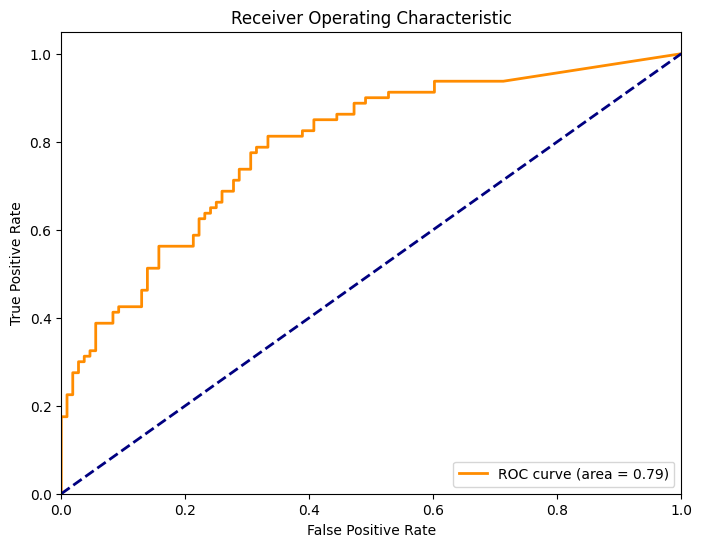

In [845]:
# ROC 곡선

from sklearn.metrics import roc_curve, roc_auc_score

y_test_pred_proba = unet.predict(X_test_seq)
fpr, tpr, thresholds = roc_curve(y_test_seq, y_test_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test_seq, y_test_pred_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [846]:
# evalutation

score_unet = unet.evaluate(X_test_seq, y_test_seq_encoded)[1] # accuracy
print (score_unet)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7340 - loss: 0.5334 
0.7180851101875305


-------

### 모델의 acc 비교

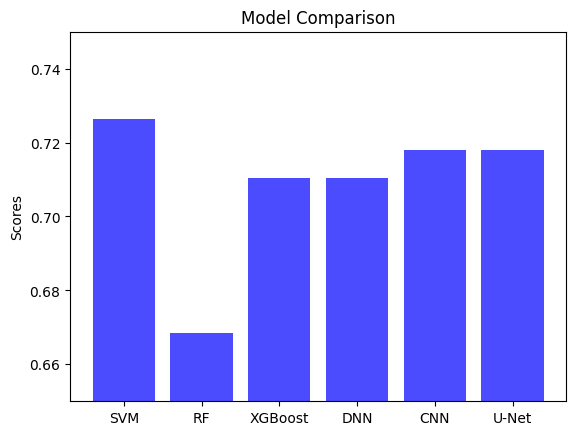

In [852]:
# 각 모델의 score을 barplot으로 비교한다


def plot_model_scores(scores, model_names) :
    """
    Plots a bar chart for model scores.

    Parameters:
    scores (list): List of scores for each model.
    model_names (list): List of model names.
    """
    
    y_pos = np.arange(len(model_names))

    plt.bar(y_pos, scores, align='center', alpha=0.7, color='blue')
    plt.xticks(y_pos, model_names)
    plt.ylabel('Scores')
    plt.title('Model Comparison')
    plt.ylim(0.65, 0.75)  # Set y-axis range

    plt.show()
    
model_names = ['SVM', 'RF', 'XGBoost', 'DNN', 'CNN', 'U-Net']
plot_model_scores ([score_SVM,
                   score_RF, 
                   score_boost, 
                   score_dnn, 
                   score_cnn,
                   score_unet], model_names)